In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('bangkok_traffy.csv')

In [22]:
df.head()

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,0,2022-06-04 15:34:14.609206+00
1,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,4.0,0,2022-06-21 08:21:09.532782+00
2,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52649,13.72060",191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...,ยานนาวา,สาทร,กรุงเทพมหานคร,2021-09-26 05:03:52.594898+00,เสร็จสิ้น,NaN,0,2022-06-06 01:17:12.272904+00
3,2021-9U2NJT,{น้ำท่วม},"เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ",น้ำท่วม,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.53099,13.81853",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-10-14 10:45:27.713884+00,เสร็จสิ้น,NaN,0,2022-09-08 08:35:43.784519+00
4,2021-DVEWYM,"{น้ำท่วม,ถนน}","เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.59165,13.82280",702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 12:29:08.408763+00,เสร็จสิ้น,5.0,0,2022-08-12 07:18:44.884945+00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787026 entries, 0 to 787025
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ticket_id      778254 non-null  object 
 1   type           786929 non-null  object 
 2   organization   786455 non-null  object 
 3   comment        778254 non-null  object 
 4   photo          786911 non-null  object 
 5   photo_after    641309 non-null  object 
 6   coords         787026 non-null  object 
 7   address        778254 non-null  object 
 8   subdistrict    786460 non-null  object 
 9   district       786465 non-null  object 
 10  province       786831 non-null  object 
 11  timestamp      787026 non-null  object 
 12  state          787026 non-null  object 
 13  star           274097 non-null  float64
 14  count_reopen   787026 non-null  int64  
 15  last_activity  787026 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 96.1+ MB


In [24]:
df.describe()

,star,count_reopen
count,274097.000000,787026.000000
mean,3.872801,0.123485
std,1.471863,0.823554
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,100.000000


In [25]:
# convert 'coords' to latitude and longitude
df[['latitude','longitude']] = df['coords'].str.split(',', expand=True).astype(float)

In [26]:
# convert 'timestamp' to datetime
df['dt_timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df['dt_timestamp']

0        2021-09-03 12:51:09.453003+00:00
1        2021-09-19 14:56:08.924992+00:00
2        2021-09-26 05:03:52.594898+00:00
3        2021-10-14 10:45:27.713884+00:00
4        2021-12-09 12:29:08.408763+00:00
                       ...               
787021   2025-01-16 02:50:24.112172+00:00
787022   2025-01-16 02:51:28.895700+00:00
787023   2025-01-16 02:52:33.878797+00:00
787024   2025-01-16 02:53:27.583947+00:00
787025   2025-01-16 02:53:34.290375+00:00
Name: dt_timestamp, Length: 787026, dtype: datetime64[ns, UTC]

In [27]:
df['state'].value_counts()

state
เสร็จสิ้น         645700
กำลังดำเนินการ    129620
รอรับเรื่อง        11706
Name: count, dtype: int64

In [28]:
# check all type of problems
ls_type = df['type']
ls_type_splitted = []
for t in ls_type:
    # delete brackets
    t_clean = str(t).replace('{','').replace('}','').replace("'",'').replace('"','')
    # split by comma and add to new list
    for tc in t_clean.split(','):
        ls_type_splitted.append(tc)

# count distinct word
ls_type_splitted.sort()
pd.Series(ls_type_splitted).value_counts()

ถนน            256397
               115110
ทางเท้า        108874
ความปลอดภัย     81678
แสงสว่าง        72986
ความสะอาด       67555
กีดขวาง         66979
ร้องเรียน       50920
จราจร           47041
ท่อระบายน้ำ     42740
น้ำท่วม         41796
ป้าย            39138
เสียงรบกวน      35434
สะพาน           34514
ต้นไม้          29625
คลอง            25867
สายไฟ           24813
สัตว์จรจัด      16553
คนจรจัด          7425
PM2.5            7402
สอบถาม           6738
เสนอแนะ          5328
การเดินทาง       2344
ห้องน้ำ          1898
ป้ายจราจร        1424
nan                97
Name: count, dtype: int64

In [29]:
pd.Series(ls_type_splitted).unique().shape

(26,)

In [30]:
def get_percentage(total, part):
    if (total == 0):
        return 0
    return (part / total) * 100.00

In [31]:
# Are there rated unsolved problem?
rated_solved_count = df[df['star'].notnull() & (df['state'] == 'เสร็จสิ้น')].shape[0]
rated_unsolved_count = df[df['star'].notnull() & (df['state'] != 'เสร็จสิ้น')].shape[0]
print(f"Rated solved: {rated_solved_count}, Rated unsolved: {rated_unsolved_count}")
print(f"Unrated solved: {df[df['state'] == 'เสร็จสิ้น'].shape[0] - rated_solved_count}, Unrated unsolved: {df[df['state'] != 'เสร็จสิ้น'].shape[0] - rated_unsolved_count}")

Rated solved: 271424, Rated unsolved: 2673
Unrated solved: 374276, Unrated unsolved: 138653


In [32]:
# Checking rated unsolved problems
df[df['star'].notnull() & (df['state'] != 'เสร็จสิ้น')].head()

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,latitude,longitude,dt_timestamp
224,2022-NMR72Y,"{ท่อระบายน้ำ,ถนน}","เขตหลักสี่,เขตจตุจักร,สำนักการโยธา กทม.,การรถไ...",ถนนกำแพงเพชร 6(โลคอลโรดเลียบสายสีแดง) ถนนไม่ดี...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.56506,13.85549",10 ถ. กำแพงเพชร 6 แขวง ตลาดบางเขน เขต หลักสี่ ...,ลาดยาว,จตุจักร,กรุงเทพมหานคร,2022-05-26 09:25:56.010889+00,กำลังดำเนินการ,1.0,0,2024-07-10 07:17:25.718672+00,100.56506,13.85549,2022-05-26 09:25:56.010889+00:00
295,2022-9VA6UQ,{แสงสว่าง},"เขตจตุจักร,สำนักการโยธา กทม.,BTS,การรถไฟฟ้าขนส...",แจ้งไฟส่องสว่าง เกาะกลาง ถ.พหลโยธิน ห้าแยกลาดพ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.56034,13.81383",27 ถนนลาดพรัาว แขวง จอมพล เขตจตุจักร กรุงเทพมห...,จตุจักร,จตุจักร,กรุงเทพมหานคร,2022-05-28 12:16:27.35797+00,กำลังดำเนินการ,1.0,0,2022-09-05 03:13:01.405784+00,100.56034,13.81383,2022-05-28 12:16:27.357970+00:00
309,2022-8DCQB7,{แสงสว่าง},"กรมป้องกันและบรรเทาสาธารณภัย,ศูนย์อำนวยการบรรเ...",ไม่มีไฟส่องสว่าง #ทางม้าลาย,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.54277,13.77655",1121 ถ. พหลโยธิน แขวง สามเสนใน เขตพญาไท กรุงเท...,สามเสนใน,พญาไท,กรุงเทพมหานคร,2022-05-28 13:35:04.654491+00,กำลังดำเนินการ,2.0,0,2025-01-05 00:28:03.790014+00,100.54277,13.77655,2022-05-28 13:35:04.654491+00:00
451,2022-G2TPRV,"{ถนน,แสงสว่าง,ความปลอดภัย}","เขตจตุจักร,สำนักการโยธา กทม.,การรถไฟแห่งประเทศ...",1.) ไม่มีไฟส่องสว่างที่ถนนกำแพงเพชร6 หน้าบ้านก...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.55478,13.83639",5/75 Baan Klang Muang Monte-Carlo Ratchavipha ...,ลาดยาว,จตุจักร,กรุงเทพมหานคร,2022-05-29 10:31:12.327121+00,กำลังดำเนินการ,5.0,0,2024-01-16 13:27:07.323095+00,100.55478,13.83639,2022-05-29 10:31:12.327121+00:00
480,2022-3EEKFK,{},"เขตสะพานสูง,เขตคันนายาว,สำนักการโยธา กทม.,ฝ่าย...",เดี๋ยวผมไปถ่ายภาพอัพเดทให้ พรุ่งนี้เช้านะครับ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.69155,13.78540",22/1 ซอย รามคำแหง 142/1 แขวง สะพานสูง เขตสะพาน...,คันนายาว,คันนายาว,กรุงเทพมหานคร,2022-05-29 10:59:17.781331+00,กำลังดำเนินการ,1.0,0,2023-01-31 06:02:06.702574+00,100.69155,13.78540,2022-05-29 10:59:17.781331+00:00


In [33]:
# given the type, how many percentage is 'solved'?
results = []
for t in pd.Series(ls_type_splitted).unique():
    df_t = df[df['type'].str.contains(t, na=False)]
    total = len(df_t)
    solved = len(df_t[df_t['state']=='เสร็จสิ้น'])
    pending = len(df_t[df_t['state']=='กำลังดำเนินการ'])
    queing = len(df_t[df_t['state']=='รอรับเรื่อง']) 
    rated = len(df_t[df_t['star'].notnull()])
    results.append({
        "Type": t.strip(),
        "Total": total,
        "Solved": solved,
        "Solved(%)": get_percentage(total, solved),
        "Rated(%)": get_percentage(total, rated),
        "Rated Score": df_t[df_t['star'].notnull()].star.mean(),
        "Rated Solved Score": df_t[df_t['star'].notnull() & (df_t['state'] == 'เสร็จสิ้น')].star.mean(),
        "Rated Unsolved Score": df_t[df_t['star'].notnull() & (df_t['state'] != 'เสร็จสิ้น')].star.mean(),
        "Pending": pending,
        "Pending(%)": get_percentage(total, pending),
        "Queing": queing,
        "Queing(%)": get_percentage(total, queing)
    })

results_df = pd.DataFrame(results)

# Show with color gradient
styled_df = results_df.style.background_gradient(
    subset=['Solved(%)', 'Rated(%)','Pending(%)', 'Queing(%)'],
    cmap='YlGn', vmin=0, vmax=100
)
display(styled_df)

,Type,Total,Solved,Solved(%),Rated(%),Rated Score,Rated Solved Score,Rated Unsolved Score,Pending,Pending(%),Queing,Queing(%)
0,,786929,645603,82.040819,34.831224,3.872801,3.881963,2.942387,129620,16.471626,11706,1.487555
1,PM2.5,7402,6498,87.787085,34.058363,3.563269,3.570567,3.029412,866,11.699541,38,0.513375
2,nan,0,0,0.000000,0.000000,nan,nan,nan,0,0.000000,0,0.000000
3,การเดินทาง,2344,1484,63.310580,29.052901,3.878120,3.894188,2.800000,793,33.831058,67,2.858362
4,กีดขวาง,66979,57046,85.169979,34.064408,3.599185,3.611693,2.562500,9499,14.182057,434,0.647964
5,คนจรจัด,7425,6409,86.316498,43.003367,3.996555,3.999369,3.590909,928,12.498316,88,1.185185
6,คลอง,25867,22125,85.533692,30.687749,3.979844,3.987144,3.280488,3469,13.410910,273,1.055399
7,ความปลอดภัย,81678,59985,73.440829,31.298514,3.964677,3.982798,2.595808,20239,24.779010,1454,1.780161
8,ความสะอาด,67555,63100,93.405373,44.283917,4.074709,4.077148,3.674033,4136,6.122419,319,0.472208
9,จราจร,48223,35981,74.613774,31.020467,3.505515,3.520263,2.552632,11593,24.040396,649,1.345831


In [34]:
# check problem by province
results = [] 
for t in pd.Series(ls_type_splitted).unique():
    df_t = df[df['type'].str.contains(t, na=False)]
    total = len(df_t)
    in_bkk = len(df_t[df_t['province'].str.contains('กรุงเทพ', na=False) | df_t['province'].str.contains('Bangkok', na=False) ])
    not_in_bkk = total - in_bkk
    results.append({
        "Type": t.strip(),
        "Total": total,
        "In BKK": in_bkk,
        "In BKK Percentage": get_percentage(total, in_bkk)
    })

results_df = pd.DataFrame(results)
styled_df = results_df.style.background_gradient(
    subset=['In BKK Percentage'], cmap='YlGn', vmin=0, vmax=100
)
display(styled_df)

,Type,Total,In BKK,In BKK Percentage
0,,786929,785565,99.826668
1,PM2.5,7402,7385,99.770332
2,nan,0,0,0.000000
3,การเดินทาง,2344,2337,99.701365
4,กีดขวาง,66979,66906,99.891011
5,คนจรจัด,7425,7415,99.865320
6,คลอง,25867,25797,99.729385
7,ความปลอดภัย,81678,81530,99.818801
8,ความสะอาด,67555,67453,99.849012
9,จราจร,48223,48092,99.728345


In [35]:
# # Plot problem locations on map
# import folium
# map_bkk = folium.Map(location=[13.7563, 100.5018], zoom_start=10)
# for idx, row in df[0:100].iterrows():
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=f"Type: {row['type']}<br>State: {row['state']}<br>Star: {row['star']}",
#         icon=folium.Icon(color='blue' if row['state']=='เสร็จสิ้น' else 'red')
#     ).add_to(map_bkk)
# map_bkk

import folium
import pandas as pd

# ตัวอย่าง: ตรวจสอบว่ามีคอลัมน์ที่ต้องใช้หรือไม่
required_cols = ['latitude', 'longitude', 'type', 'state', 'star']
for col in required_cols:
    if col not in df.columns:
        raise KeyError(f"Missing required column: '{col}' in dataframe")

# ลบแถวที่ไม่มีพิกัดออก
df_clean = df.dropna(subset=['latitude', 'longitude'])

# สร้างแผนที่กรุงเทพฯ
map_bkk = folium.Map(location=[13.7563, 100.5018], zoom_start=10)

# วนลูปสร้าง marker
for idx, row in df_clean.head(100).iterrows():
    try:
        lat, lon = float(row['latitude']), float(row['longitude'])
        popup_text = (
            f"<b>Type:</b> {row['type']}<br>"
            f"<b>State:</b> {row['state']}<br>"
            f"<b>Star:</b> {row['star']}"
        )
        color = 'blue' if str(row['state']).strip() == 'เสร็จสิ้น' else 'red'
        folium.Marker(
            location=[lat, lon],
            popup=folium.Popup(popup_text, max_width=250),
            icon=folium.Icon(color=color)
        ).add_to(map_bkk)
    except Exception as e:
        print(f"Error at index {idx}: {e}")

map_bkk


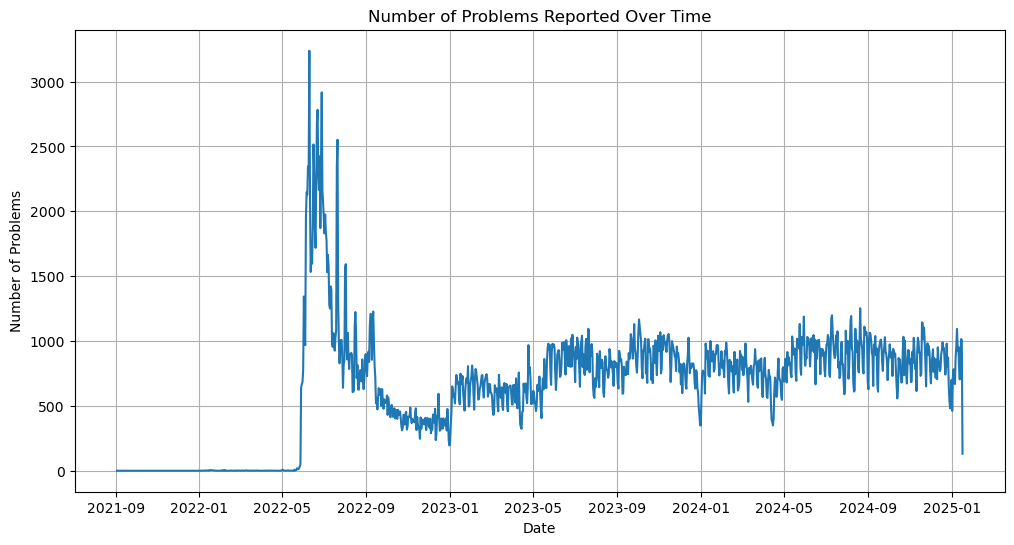

In [36]:
# How many problems reported over time?
df['date'] = df['dt_timestamp'].dt.date
problems_over_time = df.groupby('date').size()
plt.figure(figsize=(12,6))
plt.plot(problems_over_time.index, problems_over_time.values)
plt.title('Number of Problems Reported Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Problems')
plt.grid()
plt.show()